# Gradient Descent

Gradient descent is a first-order iterative optimization machine learning algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. We use gradient descent to update the parameters of our model. Since gradient descent is commonly used to train machine learning models and neural networks, the parameters refer to coefficients in linear regression and weights in neural networks. 

<img src="http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" width="500" height="500"/>

### Basic concepts of neural networks:
1. Weights and bias.
2. Activation function.
3. Loss function.

### Steps to implement gradient descent in linear models:
1. We start with a linear model $\hat{y} = \hat{w_i}X + b$. Our goal is to find the optimal linear function approximating the data. Here, $w$ and $b$ are weight and bias respectively.
2. Define a loss function. A loss function tells us “how good” our model is at making predictions for a given set of parameters. The cost function has its own curve and its own gradients. The slope of this curve tells us how to update our parameters to make the model more accurate. The loss function is shown below, and M refers to the number of data points.

$$
L = \frac{1}{2M}\sum_{i = 1}^{M}(\hat{w_i}x_i + b - y_i)^2
$$

3. Use gradient descent to calculate the gradient of the loss function.
$$
\frac{\partial L}{\partial w} = \frac{1}{M}\sum_{i = 1}^{M}(\hat{w_i}x_i + b - y_i)x_i
$$

$$
\frac{\partial L}{\partial b} = \frac{1}{M}\sum_{i = 1}^{M}(\hat{w_i}x_i + b - y_i)
$$

4. Choose a learning rate $\alpha$. Also, select a max_iteration, and set count to 0.
5. While count is smaller than  max_iteration, we update $\hat{w} = \hat{w} - \alpha\frac{\partial L}{\partial w}$, and update $b = b - \alpha\frac{\partial L}{\partial b}$. Count increases by 1.

# My Implementation On Real Estate Dataset

I choose the real estate data to implement gradient descent. There are 6 predictor variables and 1 target variable in total:

### Predictor variable:
1. X1 transaction date
2. X2 house age
3. X3 distance to the nearest MRT station
4. X4 number of convenience stores
5. X5 latitude
6. X6 longitude

### Target variable:
1. Y house price of unit area

Our goal is to find the optimal linear function approximating the data.

# Coding Part

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing

# Import the real estate data
df = pd.read_csv('real_estate.csv')

In [13]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Let's take a look at some features of the diabetes dataset.

In [14]:
df.iloc[:, 1:8].describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Now, we set X to be "X3 distance to the nearest MRT station" and set y to be "Y house price of unit area". Then normalize X and y using preprocessing imported from sklearn.

In [15]:
X = df['X3 distance to the nearest MRT station']
y = df['Y house price of unit area']
X = preprocessing.scale(X)
y = preprocessing.scale(y)

Define a loss function:

In [16]:
def loss(X, y, w, b):
    M = len(y)
    MSE_loss = sum(0.5*(x*w+b-y[i])**2 
               for i,x in enumerate(X))/M
    return MSE_loss

###  Set $\alpha = 0.12$

Set the learning rate $\alpha$ to 0.12 and define a function for gradient descent.

In [33]:
alpha = 0.12 #learning rate
def gradL(X, y, w, b): 
    M = len(y)
    partial_w = sum((x*w+b-y[i])*x for i,x in enumerate(X))/M
    partial_b = sum((x*w+b-y[i]) for i,x in enumerate(X))/M
    return partial_w, partial_b

We then plot the linear regression lines with different iterations $\in$ {10, 20, 30, 50} using $\alpha = 0.12$. From the plot, we see that all the lines are downward-sloping, indicating that as the distance to the nearest MRT station increases, the house price of unit area decreases. This result is reasonable.

Loss at iter10 = 0.3113569301738707
Loss at iter20 = 0.27608840179375943
Loss at iter30 = 0.2733528762050902
Loss at iter50 = 0.2731242443121024


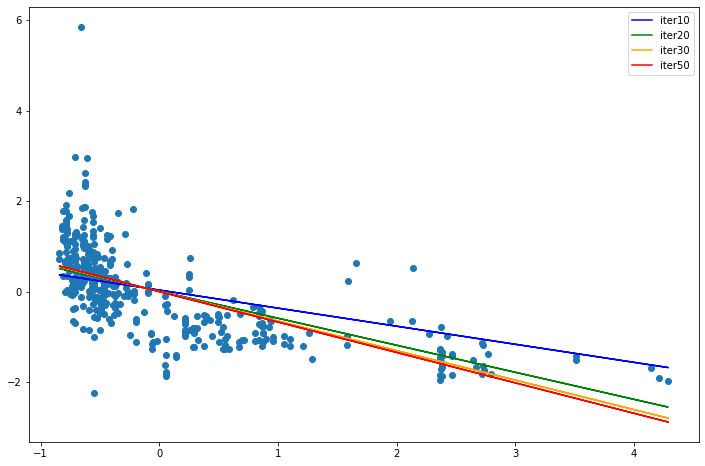

In [34]:
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12, 8))
plt.scatter(X,y)

colors = {10:'blue', 20:'green', 30:'orange' , 50:'red'}
for i in range(51):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [10, 20, 30, 50]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()  

###  Set $\alpha = 0.01$

Then, we set the learning rate $\alpha$ to a much smaller value 0.01 and replot the linear lines.

Loss at iter10 = 1.1001741187059209
Loss at iter20 = 0.949573822342581
Loss at iter30 = 0.826396795142809
Loss at iter50 = 0.6432474975422948


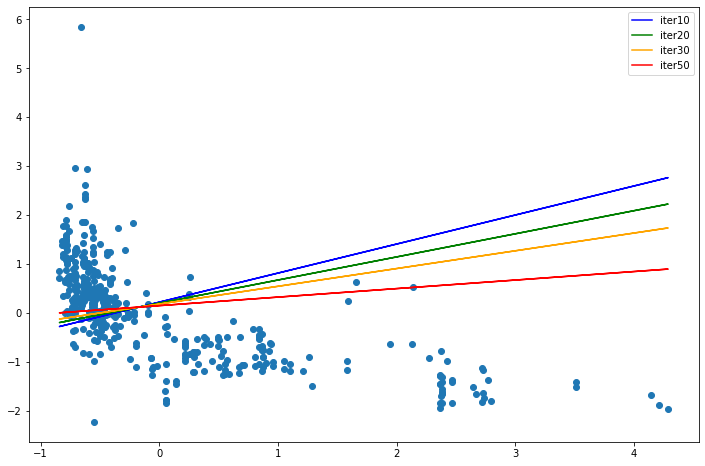

In [36]:
alpha = 0.01
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12,8))
plt.scatter(X,y)

colors = {10:'blue', 20:'green', 30:'orange' , 50:'red'}
for i in range(51):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [10, 20, 30, 50]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()

When $\alpha = 0.01$, it is surprising to see that all lines are upward-sloping, and these lines do not conform with the scatter plot well. Furthermore, it is unreasonable that as the distance to the nearest MRT station increases, the house price of unit area also increases. Since $\alpha = 0.01$ indicates that the learning process is slower, we might conclude that a smaller $\alpha$ does not allow the model to learn sufficiently.

###  Set $\alpha = 0.3$

Now, let's try a much larger learning rate $\alpha = 0.3$.

Loss at iter10 = 0.2734057076422814
Loss at iter20 = 0.27312308623097875
Loss at iter30 = 0.2731228607209497
Loss at iter50 = 0.2731228605408665


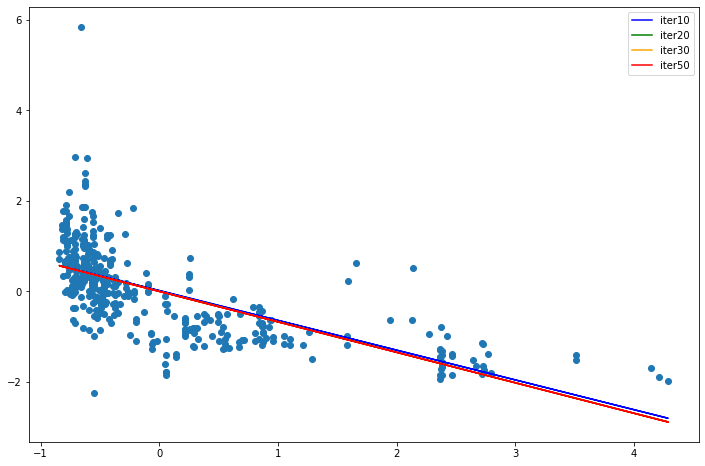

In [38]:
alpha = 0.3
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]
plt.figure(figsize = (12,8))
plt.scatter(X,y)

colors = {10:'blue', 20:'green', 30:'orange' , 50:'red'}
for i in range(51):
    dw,db = gradL(X, y, w, b)
    w -= alpha*dw
    b -= alpha*db
    L = loss(X,y,w,b)
    if i in [10, 20, 30, 50]:
        print(f'Loss at iter{i} = {L}')
        plt.plot(X, [w*x+b for x in X], label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()

When $\alpha$ is 0.3, only the line for 10 iterations and the line for 50 iterations are shown in the plot, and they almost overlap. The losses are almost equal for four different iterations. The lines conform with the actual data well.

In conclusion, the larger the learning rate, the faster the model learns. Also, more iterations yield a smaller loss.

# References

Gradient descent. Wikipedia. https://en.wikipedia.org/wiki/Gradient_descent

Gradient descent. 2017. https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html#gradient-descent